In [7]:
import pandas as pd
import numpy as np
import requests
from urllib.parse import urlparse
import re
import seaborn as sns
import plotly.express as px

In [8]:
data=pd.read_csv("malicious_phish.csv")
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [10]:
data.isnull().sum()

url     0
type    0
dtype: int64

In [11]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
data['Category'] = data['type']
data = data.replace(rem)

C:\Users\karth\AppData\Local\Temp\ipykernel_11552\1624019599.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(rem)


<Axes: xlabel='type', ylabel='count'>

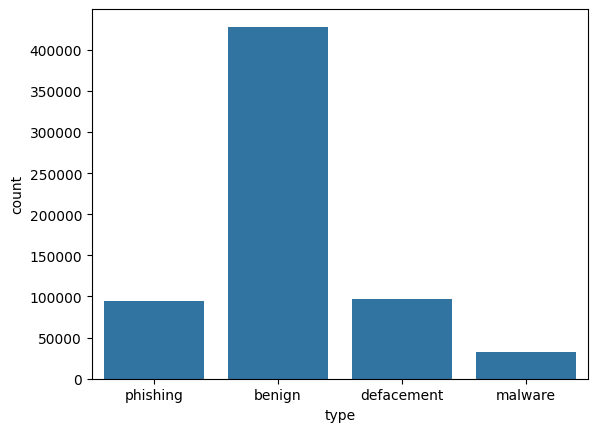

In [12]:
custom_palette = sns.color_palette("husl", len(data['type'].unique()))
sns.countplot(x='type',data=data)

In [13]:
data['url'] = data['url'].replace('www.', '', regex=True)

In [14]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

In [15]:
def extract_domain_from_url(url):
    try:
        # Check if the URL has a protocol prefix, if not, add 'http://'
        if not url.startswith("http://") and not url.startswith("https://"):
            url = "http://" + url
        parsed_url = urlparse(url)
        domain = parsed_url.netloc
        if domain.startswith("www."):
            domain = domain[4:]  # Remove 'www.' if present
        return domain
    except Exception as e:
        print("Error extracting domain for URL:", url)
        print("Error:", e)
        return None


data['domain'] = data['url'].apply(extract_domain_from_url)

# Print the DataFrame with the extracted domains
print(data)


Error extracting domain for URL: http://RybjUxÙãl5»7ÆE%ÝÔk+h|U+ýk©ìÉ½Æq]âF·õÁ¢w)ëA·ç°{t*m!¦2
Error: Invalid IPv6 URL
Error extracting domain for URL: http://ÆeF§÷%¶¿Õ½9¿b@Ö¸ÚZE¤ÒC¢ÄÅª2åç-]W³fU¤Jgkz.ø¿nJçåæuøD%@ðûÇùM¹uË
Error: Invalid IPv6 URL
Error extracting domain for URL: http://Ó6¸RTÃu~æÙg0>÷mÖiÓ=;XZ\%êýÜÉfn&\°%7õÉ"ieÖ1ÄÁêFÐò<$cï6t[0ò2"/Æa^2âpù/ýãÇ$E¬R«È²ú[Ì¶p¥qÒ°i°^ò[»³»]±9êdÓS¿Ë]ùþ5j¿·ªocÂplà7ÊÏJ§¢#3ðDCDõ²çÇGÝ.Vò=¿QB§Ä'`ÊáZÉê ÔîÆm®ÍÝQÓ(z;¹Áê¬âytÖÙ®ëNP²ÜEQ
Error: Invalid IPv6 URL
Error extracting domain for URL: http://oÍÑOwEuÊÚÃß=nËß[j{2%.tñø­½½qx½NºPmx$Aì&ÝIhÂéc¶A9®cì3ßyiÚý~JÍf]$ö M¸°;xÃu0IÅ@xõe^cÃ ¸´ÞO7B~FrØ\<kÅb{T!Ìé	r?kX-YÇS@T)LeaÃ}°¡ùï4ºkïá2¢kEì¬ôfsçË×ÛQìê{o£UÜ§D©l½±±äâqôó¼-â0èÙ¦kvîdàQÎé6°Ò¼©
Error: 'j{2%.tñ\x9c\x17ø\x91\xad½½qx½NºPmx$Aì&\x9eÝ\x88\x9bIh\x8e\x80Âéc¶A9®c\x90\x02ì3ßyiÚ\x9a\x8cý~\x88\x06\x06JÍf' does not appear to be an IPv4 or

In [16]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))

In [17]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


In [18]:
def is_abnormal_url(url):
    # Check for abnormal length
    if len(url) < 10 or len(url) > 500:
        return True
    
    # Check for abnormal characters
    if not re.match(r'^[\w\-.:/]+$', url):
        return True
    
    # Check for missing protocol
    if not url.startswith("http://") and not url.startswith("https://"):
        return True
    
    # Check for abnormal domain patterns
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    if any(char.isdigit() for char in domain):
        return True
    
    # Check for abnormal query strings
    query_string = parsed_url.query
    if query_string:
        parameters = query_string.split("&")
        for param in parameters:
            if re.match(r'.*script.*', param, re.IGNORECASE):
                return True
    
    # If none of the above conditions are met, consider the URL normal
    return False

# Apply the is_abnormal_url function to each URL in the dataset
data['abnormal'] = data['url'].apply(lambda i: is_abnormal_url(i))

# Filter out abnormal URLs
abnormal_urls = data[data['abnormal']]

<Axes: xlabel='abnormal', ylabel='count'>

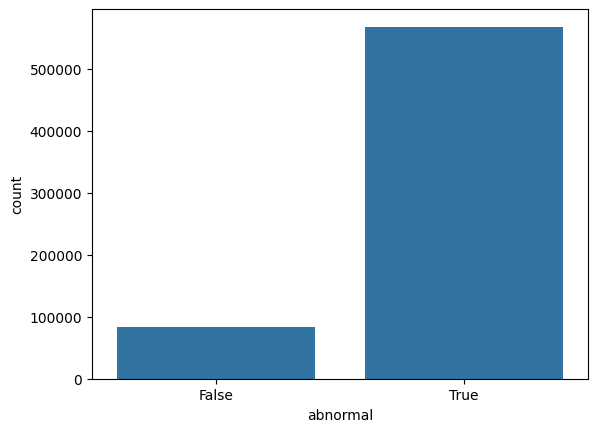

In [19]:
import seaborn as sns
sns.countplot(x='abnormal', data=data)

In [20]:
def is_secure_url(url):
    return url.startswith("https://")
# Apply the is_secure_url function to each URL in the dataset
data['is_secure'] = data['url'].apply(lambda i: is_secure_url(i))

# Filter out secure URLs
secure_urls = data[data['is_secure']]

<Axes: xlabel='is_secure', ylabel='count'>

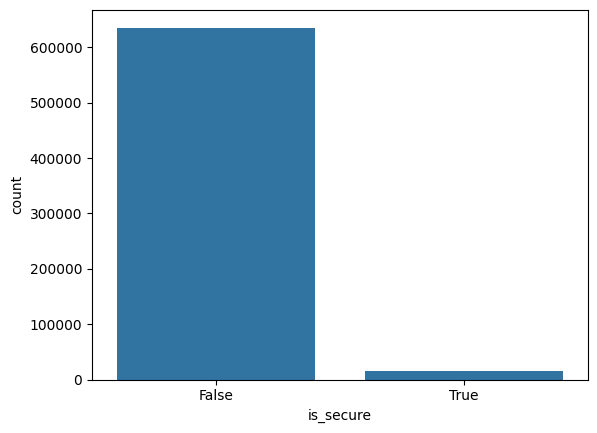

In [21]:
sns.countplot(x="is_secure",data=data)

In [22]:
#data['is_secure_url'] = data['url'].apply(lambda i: is_secure_url(i))

In [23]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [24]:
data['digits']= data['url'].apply(lambda i: digit_count(i))

In [25]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [26]:
data['letters']= data['url'].apply(lambda i: letter_count(i))

In [27]:
def is_shortened_url(url):
    shortening_services = [
        "bit.ly", "goo.gl", "tinyurl.com", "t.co", "ow.ly", "buff.ly", 
        "rebrand.ly", "shor.by", "shorte.st", "ow.ly", "cli.gs", "adf.ly",
        # Add more URL shortening services as needed
    ]
    for service in shortening_services:
        if service in url:
            return True
    return False
# Apply the is_shortened_url function to each URL in the dataset
data['is_shortened'] = data['url'].apply(lambda x: is_shortened_url(x))

# Filter out URLs from shortening services
shortened_urls = data[data['is_shortened']]

<Axes: xlabel='is_shortened', ylabel='count'>

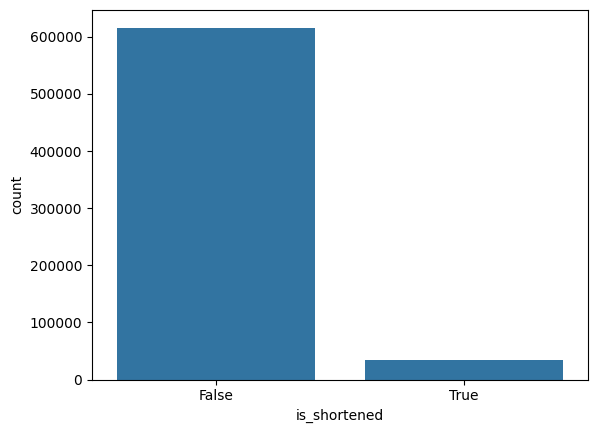

In [28]:
sns.countplot(x="is_shortened",data=data)

In [29]:
#data['Shortining_Service'] = data['url'].apply(lambda x: is_shortened_url(x))

In [30]:
def contains_ip_address(url):
    ip_pattern = r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b'
    return bool(re.search(ip_pattern, url))
# Apply the contains_ip_address function to each URL in the dataset
data['has_ip_address'] = data['url'].apply(lambda i: contains_ip_address(i))

# Filter out URLs containing IP addresses
ip_urls = data[data['has_ip_address']]

<Axes: xlabel='has_ip_address', ylabel='count'>

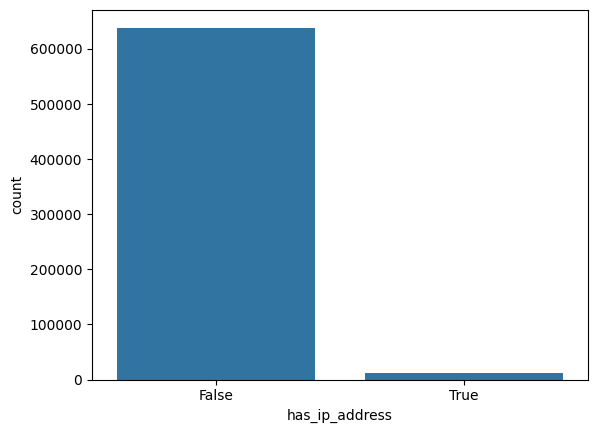

In [31]:
sns.countplot(x="has_ip_address",data=data)

In [32]:
#data['having_ip_address'] = data['url'].apply(lambda i: contains_ip_address(i))

In [33]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,!,*,",",//,abnormal,is_secure,digits,letters,is_shortened,has_ip_address
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,True,False,0,13,False,False
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,True,False,1,29,False,False
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,True,False,1,25,False,False
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,1,True,False,7,60,False,False
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,1,True,False,22,199,False,False


In [34]:
ip_urls.count()

url               12368
type              12368
Category          12368
url_len           12368
domain            12368
@                 12368
?                 12368
-                 12368
=                 12368
.                 12368
#                 12368
%                 12368
+                 12368
$                 12368
!                 12368
*                 12368
,                 12368
//                12368
abnormal          12368
is_secure         12368
digits            12368
letters           12368
is_shortened      12368
has_ip_address    12368
dtype: int64

In [35]:
data.shape

(651191, 24)

In [36]:
#num_rows_to_drop = 500000
#rows_to_drop = np.random.choice(data.index, size=num_rows_to_drop, replace=False)
#data = data.drop(index=rows_to_drop)

In [37]:
data=data.drop(['type'],axis=1)

In [38]:
data = data.iloc[:-500000]

In [39]:
data.shape

(151191, 23)

In [40]:
x = data.drop(['url','Category','domain'],axis=1)#,'type_code'
y = data['Category']

In [41]:
x

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal,is_secure,digits,letters,is_shortened,has_ip_address
0,16,0,0,1,0,2,0,0,0,0,0,0,0,0,True,False,0,13,False,False
1,35,0,0,0,0,2,0,0,0,0,0,0,0,0,True,False,1,29,False,False
2,31,0,0,0,0,2,0,0,0,0,0,0,0,0,True,False,1,25,False,False
3,84,0,1,1,4,2,0,0,0,0,0,0,0,1,True,False,7,60,False,False
4,235,0,1,1,3,2,0,0,0,0,0,0,0,1,True,False,22,199,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151186,58,0,0,4,0,1,0,0,0,0,0,0,0,0,True,False,5,45,False,False
151187,61,0,0,2,0,2,0,0,0,0,0,0,0,1,False,False,0,52,False,False
151188,71,0,0,5,0,3,0,0,0,0,0,0,0,0,True,False,6,55,False,False
151189,26,0,0,0,0,1,0,0,0,0,0,0,0,0,True,False,6,17,False,False


In [42]:
y

0         2
1         0
2         0
3         1
4         1
         ..
151186    0
151187    1
151188    0
151189    0
151190    0
Name: Category, Length: 151191, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [44]:
x_train

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal,is_secure,digits,letters,is_shortened,has_ip_address
9230,63,0,1,0,2,2,0,0,0,0,0,0,0,1,True,False,2,49,False,False
119330,36,0,0,0,0,2,0,0,0,0,0,0,0,0,True,False,0,31,False,False
62503,48,0,0,1,0,2,0,0,0,0,0,0,0,0,True,False,6,36,False,False
118370,46,0,0,0,0,2,0,0,0,0,0,0,0,0,True,False,0,40,False,False
74542,29,0,0,1,0,2,0,0,0,0,0,0,0,0,True,False,7,16,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,99,0,1,0,5,2,0,0,0,0,0,0,0,1,True,False,11,69,False,False
103694,53,0,0,1,0,3,0,0,0,0,0,0,0,0,True,False,2,43,False,False
131932,53,0,0,0,0,2,0,0,0,0,0,0,0,0,True,False,7,39,False,False
146867,99,0,0,0,0,1,0,27,0,0,0,0,0,1,True,False,33,33,False,False


In [45]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.fit_transform(x_test)

In [46]:
x_train

array([[ 0.11202421, -0.02598889,  1.80449124, ...,  0.15561533,
        -0.23652393, -0.02421099],
       [-0.59176079, -0.02598889, -0.53350714, ..., -0.50527046,
        -0.23652393, -0.02421099],
       [-0.27896746, -0.02598889, -0.53350714, ..., -0.32169107,
        -0.23652393, -0.02421099],
       ...,
       [-0.1486369 , -0.02598889, -0.53350714, ..., -0.21154344,
        -0.23652393, -0.02421099],
       [ 1.0504042 , -0.02598889, -0.53350714, ..., -0.4318387 ,
        -0.23652393, -0.02421099],
       [-0.43536412, -0.02598889, -0.53350714, ..., -0.35840695,
        -0.23652393, -0.02421099]])

In [47]:
print("x training size:",x_train.shape)
print("x testing size:",x_test.shape)
print("y training size:",y_train.shape)
print("y testing size:",y_test.shape)

x training size: (105833, 20)
x testing size: (45358, 20)
y training size: (105833,)
y testing size: (45358,)


In [48]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',random_state=0,C=1.0)
svm.fit(x_train,y_train)

SVC(random_state=0)

In [49]:
pred=svm.predict(x_test)

In [50]:
pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [51]:
y_test

133423    0
91953     0
65606     1
100655    2
105466    0
         ..
7565      1
32157     1
60045     1
125809    0
67604     1
Name: Category, Length: 45358, dtype: int64

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,pred)

0.9183826447374223

# LSTM

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [54]:
model = Sequential([
    LSTM(64, input_shape=(x_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

C:\Users\karth\anaconda\envs\DL\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [56]:
#train model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
2977/2977 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - accuracy: 0.8114 - loss: -0.2795 - val_accuracy: 0.7886 - val_loss: -4.4333
Epoch 2/10
2977/2977 ━━━━━━━━━━━━━━━━━━━━ 46s 15ms/step - accuracy: 0.8317 - loss: -5.1254 - val_accuracy: 0.8430 - val_loss: -9.5913
Epoch 3/10
2977/2977 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step - accuracy: 0.8352 - loss: -10.2366 - val_accuracy: 0.8643 - val_loss: -16.0367
Epoch 4/10
2977/2977 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step - accuracy: 0.8313 - loss: -15.6209 - val_accuracy: 0.8161 - val_loss: -20.4232
Epoch 5/10
2977/2977 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step - accuracy: 0.8365 - loss: -21.1020 - val_accuracy: 0.8143 - val_loss: -25.5793
Epoch 6/10
2977/2977 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step - accuracy: 0.8368 - loss: -26.5826 - val_accuracy: 0.7947 - val_loss: -35.9061
Epoch 7/10
2977/2977 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.8333 - loss: -30.6192 - val_accuracy: 0.8356 - val_loss: -41.5075
Epoch 8/10
2977/2977 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/s

In [57]:
#Evalute model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

1418/1418 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8175 - loss: -59.8275
Test Loss: -59.31022644042969, Test Accuracy: 0.8173861503601074


In [58]:
#predictions
predictions = model.predict(x_test)
binary_predictions = (predictions > 0.5).astype(int)

1418/1418 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step


In [59]:
predictions

array([[0.10466646],
       [0.10033531],
       [1.        ],
       ...,
       [0.9999999 ],
       [0.8538661 ],
       [1.        ]], dtype=float32)

In [60]:
binary_predictions

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [61]:
y_test

133423    0
91953     0
65606     1
100655    2
105466    0
         ..
7565      1
32157     1
60045     1
125809    0
67604     1
Name: Category, Length: 45358, dtype: int64

# Random Forest Classifier

In [62]:
data.head()

,url,Category,url_len,domain,@,?,-,=,.,#,...,!,*,",",//,abnormal,is_secure,digits,letters,is_shortened,has_ip_address
0,br-icloud.com.br,2,16,br-icloud.com.br,0,0,1,0,2,0,...,0,0,0,0,True,False,0,13,False,False
1,mp3raid.com/music/krizz_kaliko.html,0,35,mp3raid.com,0,0,0,0,2,0,...,0,0,0,0,True,False,1,29,False,False
2,bopsecrets.org/rexroth/cr/1.htm,0,31,bopsecrets.org,0,0,0,0,2,0,...,0,0,0,0,True,False,1,25,False,False
3,http://garage-pirenne.be/index.php?option=com_...,1,84,garage-pirenne.be,0,1,1,4,2,0,...,0,0,0,1,True,False,7,60,False,False
4,http://adventure-nicaragua.net/index.php?optio...,1,235,adventure-nicaragua.net,0,1,1,3,2,0,...,0,0,0,1,True,False,22,199,False,False


In [63]:
x1=data.drop(['domain','Category','url'],axis=1)
y1=data['Category']

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=0)

In [65]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier()
clf1.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
pred1=clf1.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred1,y_test))

0.9728603553948587


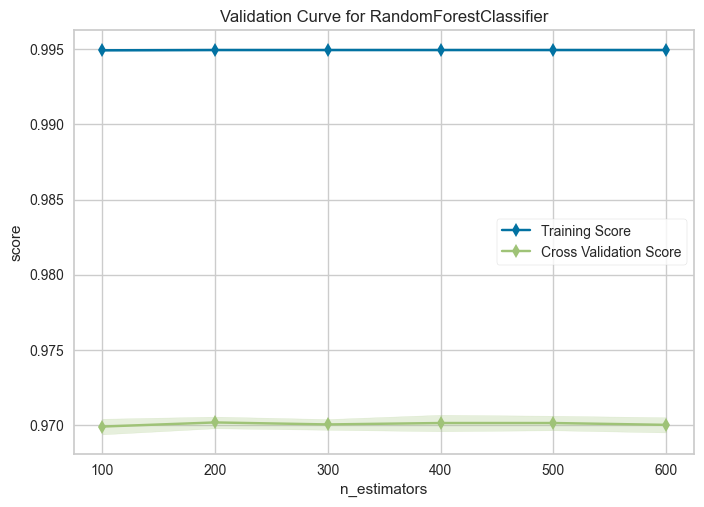

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([100, 200, 300, 400, 500, 600]),
                scoring='accuracy')


In [69]:
from yellowbrick.model_selection import validation_curve
num_est=[100,200,300,400,500,600]
print(validation_curve(RandomForestClassifier(),
                       X=x_train,
                       y=y_train,
                       param_name='n_estimators',
                      param_range=num_est,
                       scoring='accuracy',cv=3))

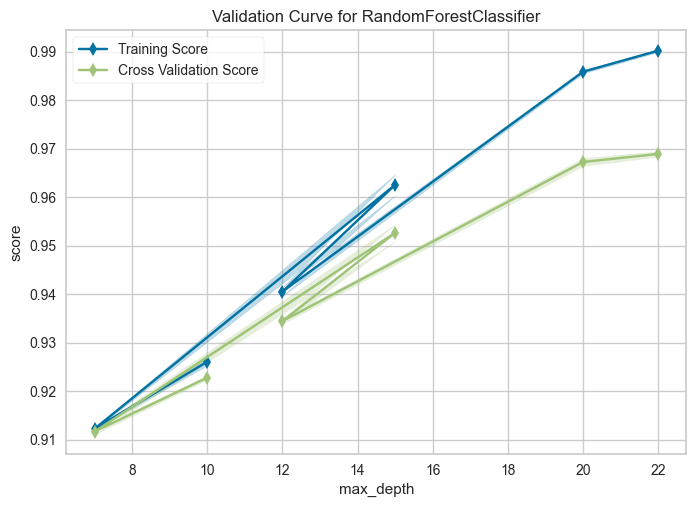

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([10,  7, 15, 12, 20, 22]),
                scoring='accuracy')


In [70]:
depth_val=[10,7,15,12,20,22]
print(validation_curve(RandomForestClassifier(),
                       X=x_train,
                       y=y_train,
                       param_name='max_depth',
                      param_range=depth_val,
                       scoring='accuracy',cv=3))

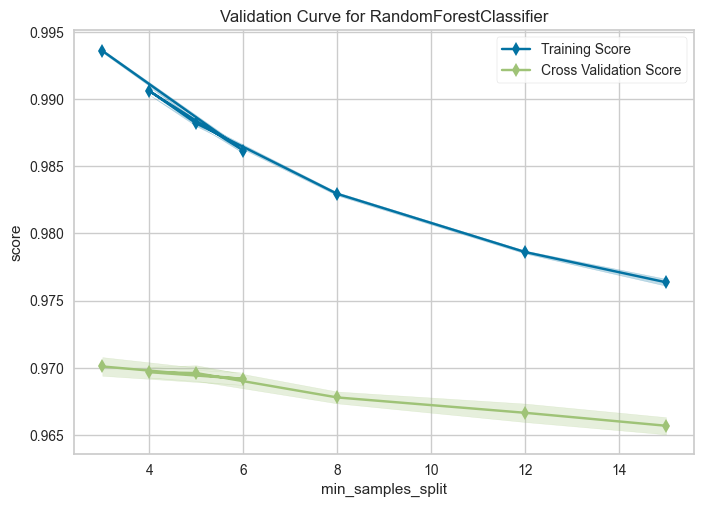

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  6,  4,  5,  8, 12, 15]),
                scoring='accuracy')


In [71]:
min_sample=[3,6,4,5,8,12,15]
print(validation_curve(RandomForestClassifier(),
                       X=x_train,
                       y=y_train,
                       param_name='min_samples_split',
                      param_range=min_sample,
                       scoring='accuracy',cv=3))

In [72]:
clf2=RandomForestClassifier(n_estimators=600,
                           min_samples_split=2,
                           max_depth=22,
                           random_state=0)
clf2.fit(x_train,y_train)
pred2=clf2.predict(x_test)

In [73]:
print(accuracy_score(pred2,y_test))

0.9714714052647824


If we use optimization models also it shows 97% of accuracy model

By selecting only important features and check the model performance

In [74]:
feature_score=pd.Series(clf2.feature_importances_,
                       index=x_train.columns).sort_values(ascending=False)
print(feature_score)

//                2.921986e-01
url_len           1.564635e-01
letters           1.358597e-01
=                 9.121072e-02
abnormal          8.480415e-02
digits            6.763129e-02
.                 5.272448e-02
-                 4.673933e-02
?                 3.627117e-02
%                 2.374124e-02
+                 3.850495e-03
is_shortened      3.154771e-03
is_secure         2.991242e-03
,                 1.583337e-03
has_ip_address    4.249351e-04
@                 1.806738e-04
!                 8.451491e-05
#                 7.190440e-05
*                 1.322762e-05
$                 6.378033e-07
dtype: float64


Text(0.5, 0, 'Feature importances')

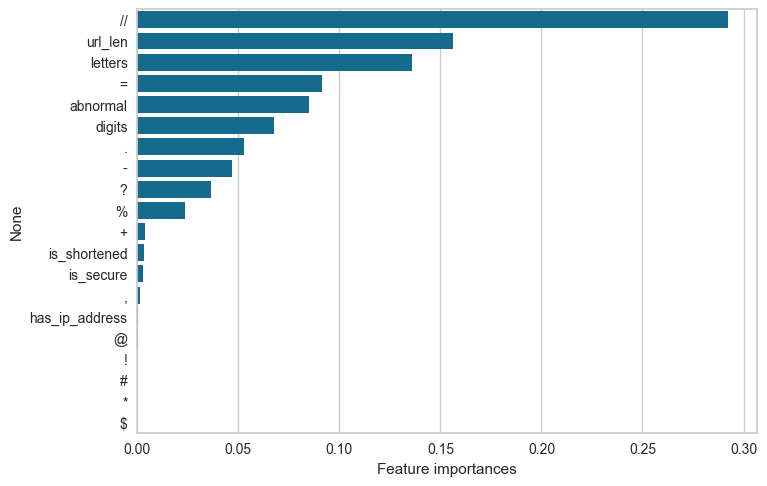

In [77]:
import matplotlib.pyplot as plt
sns.barplot(x=feature_score,y=feature_score.index)
plt.xlabel("Feature importances")

In [78]:
#by removing unimportance features the accuracy value is increase
clf3=RandomForestClassifier()
x1=data.drop(['$','*','#','!','@','has_ip_address',',','is_secure','is_shortened','+','%','?','-','.','url','domain','Category'],axis=1)
#yn=data['Category']
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=0)
clf3.fit(x_train,y_train)
pred3=clf3.predict(x_test)

In [79]:
print(accuracy_score(pred3,y_test))

0.9478372062260241


BY USING IMPORTANT FEATURES ALSO IT SHOWS 94% LESS THAN OPTIMIZATION MODELS PERFOEMANCE

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset containing URLs and their features
#df = pd.read_csv("dataset.csv")  # Replace "dataset.csv" with your dataset file path

# Select features and target variable
X = data.drop(columns=['url','domain','Category'])
y = data['Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9752637322662786


To Detect the malicious urls

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming 'data' contains your dataset with features and labels
X = data.drop(columns=['url', 'Category', 'domain'])  # Features
y = data['Category']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Predict on new data
#new_data = ...  # New data containing URLs
#new_features = new_data.drop(columns=['url', 'domain'])  # Extract features
predictions = clf.predict(X)

# Filter out the detected malicious URLs
detected_malicious_urls = data[predictions != 0]['url']

if not detected_malicious_urls.empty:
    print("Detected malicious URLs:")
    for url in detected_malicious_urls:
        print(url)
else:
    print("No malicious URLs detected.")


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22130
           1       0.95      0.97      0.96      5554
           2       0.92      0.82      0.87      1836
           3       0.92      0.84      0.88       719

    accuracy                           0.98     30239
   macro avg       0.95      0.90      0.92     30239
weighted avg       0.97      0.98      0.97     30239

Detected malicious URLs:
br-icloud.com.br
http://garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15
http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0
http://pashminaonline.com/pure-pashminas
http://ikenmijnkunst.nl/index.php/exposities/exposities-2006
http://lebensmittel-ueberwachung.de/index.php/aktuelles.1
http://szabadmunkaero.hu/cimoldal.html?sta

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

